# Ford GoBike System Data Exploration
## by Khalid Alqahtani

## Preliminary Wrangling

> This document explores a dataset containing attributes for approximately 520,000 bike trips.

In [168]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [169]:
bike = pd.read_csv('2017-fordgobike-tripdata.csv')

In [170]:
bike.shape

(519700, 15)

In [171]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [172]:
bike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN


In [173]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


### What is the structure of your dataset?

> This notebook uses a cleand dataset from the Ford GoBike System Data. There are 96,877 bike rides with 22 attributes	
duration_sec	
start_time	
end_time	
start_station_id	
start_station_name	
start_station_latitude	
start_station_longitude	
end_station_id	
end_station_name	
end_station_latitude	
end_station_longitude	
bike_id	
user_type	
member_birth_year	
member_gender

* The start_time and end_time are objects, They need to be converted to datetime format
* The time variables can be broken down into time of day, day of the week, or month of the year.
* The dataset provides subscribers birth year, so ages can be derived by using the year of the dataset. 

### What is/are the main feature(s) of interest in your dataset?

> I'm intrested in which time of the day and which day and month the trips are taken also in the stations of the start and the end, also i'm intrested in biker if he's a Subscriber or a Customer.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I excpect the start and end stations to help me in investigation. I also think that Morning and afternoon will have the most trips and the weekdays also will have more trips than the weekends, for the months I'm not quite sure so i will leave this topic in the analysis.

### Note
> before starting I will handle and clean a couple of issues in the dataset for it to be clean and ready for the analysis.


* Convert time variables from object to datetime    
A. month of the year

In [174]:
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['start_month_num'] = bike['start_time'].apply(lambda time: time.month)
bike['start_month_char'] = bike['start_month_num'].apply(lambda x: calendar.month_abbr[x])

B. morning, afternoon, night of a day

In [175]:
bike['start_hour'] = bike['start_time'].apply(lambda time: time.hour)
bike['period_day'] = 'morning'
bike['period_day'][(bike['start_hour'] >= 12) & (bike['start_hour'] <= 17)] = 'afternoon'
bike['period_day'][(bike['start_hour'] >= 18) & (bike['start_hour'] <= 23)] = 'night'

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


C. Day of the week

In [176]:
bike['start_weekday_num'] = bike['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike['start_weekday_char'] = bike['start_weekday_num'].map(dmap)

Test all the above 

In [177]:
bike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,96,Customer,1987.0,Male,12,Dec,16,afternoon,6,Sun
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,88,Customer,1965.0,Female,12,Dec,15,afternoon,6,Sun
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,...,1094,Customer,NaN,NaN,12,Dec,22,night,6,Sun


* Convert time period, month, and weekday into ordered categorical types

In [178]:
ordinal_var_dict = {'start_month_char': ['Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                    'period_day': ['morning', 'afternoon', 'night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

Test the above

In [179]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 21 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
start_month_num            519700 non-null int64
start_month_char           519700 non-null category
start_hour                 51

In [180]:
bike.sample(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char
367671,5272,2017-09-08 10:39:15.287,2017-09-08 12:07:07.9920,28,The Embarcadero at Bryant St,37.787168,-122.388098,19,Post St at Kearny St,37.788975,...,2284,Customer,1987.0,Male,9,Sep,10,morning,4,Fri


## Univariate Exploration

> I'll start by looking at the distribution of the main interest: the start time by period, weekday and month.

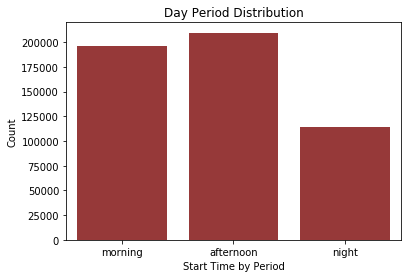

In [181]:
sb.countplot(data=bike, x='period_day', color='brown')
plt.xlabel('Start Time by Period')
plt.ylabel('Count')
plt.title('Day Period Distribution');

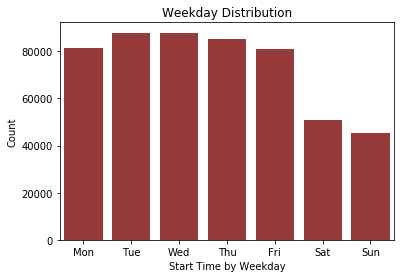

In [182]:
sb.countplot(data=bike, x='start_weekday_char', color='brown')
plt.xlabel('Start Time by Weekday')
plt.ylabel('Count')
plt.title('Weekday Distribution');

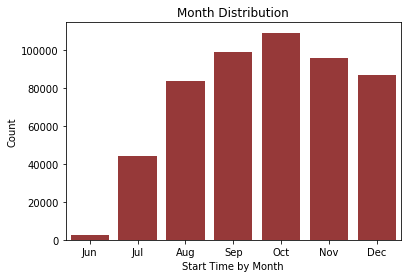

In [183]:
sb.countplot(data=bike, x='start_month_char', color='brown')
plt.xlabel('Start Time by Month')
plt.ylabel('Count')
plt.title('Month Distribution');

1- 'Day Period Distribution' shows us that Morning and Afternoon periods is where the most bike trips are and that is to be excpected.      
2- 'Weekday Distribution' shows that the wweekdays have more trips than the weekends as we excpected.   
3- 'Month Distribution' show a rise in Sep and Oct but then decrease in Nov and Dec, Jun trip counts is very low and we will have to look at that to know why.

In [184]:
jun = bike.query('start_month_char == "Jun"')
jun.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char
517011,531,2017-06-30 23:58:16.883,2017-07-01 00:07:07.9610,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,26,1st St at Folsom St,37.78729,...,823,Subscriber,1968.0,Male,6,Jun,23,night,4,Fri


In [185]:
jun.tail(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char
519699,188,2017-06-28 09:49:46.377,2017-06-28 09:52:55.3380,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,...,117,Subscriber,1984.0,Male,6,Jun,9,morning,2,Wed


From the 'start_time' attribute we can see that the data of jun starts from 28-6-2017 so it only recorded the last 3 days of the month (28, 29, 30), I will remove the month 'Jun' data from the dataset.

In [186]:
# remove it
bike = bike.query('start_month_char != "Jun"')
# re organize the months
mon= ['Jul','Aug','Sep','Oct','Nov','Dec']
mon2 = pd.api.types.CategoricalDtype(ordered=True, categories=mon)
bike['start_month_char'] = bike['start_month_char'].astype(mon2)

Test the above code

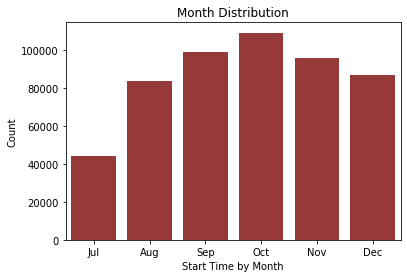

In [187]:
sb.countplot(data=bike, x='start_month_char', color='brown')
plt.xlabel('Start Time by Month')
plt.ylabel('Count')
plt.title('Month Distribution');

> Next up, the start and end location.

In [188]:
# there are 272 start locations.
bike.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)                 14978
The Embarcadero at Sansome St                                      13517
San Francisco Caltrain (Townsend St at 4th St)                     12366
San Francisco Caltrain Station 2  (Townsend St at 4th St)          12003
Market St at 10th St                                               11852
Montgomery St BART Station (Market St at 2nd St)                   11207
Berry St at 4th St                                                 10856
Powell St BART Station (Market St at 4th St)                       10097
Howard St at Beale St                                               9809
Steuart St at Market St                                             9347
Powell St BART Station (Market St at 5th St)                        7910
Embarcadero BART Station (Beale St at Market St)                    7549
2nd St at Townsend St - Coming Soon                                 6487
3rd St at Townsend St                              

In [189]:
# there's also 272 end locations
bike.end_station_name.value_counts()

San Francisco Caltrain (Townsend St at 4th St)                     17154
San Francisco Ferry Building (Harry Bridges Plaza)                 16856
The Embarcadero at Sansome St                                      16383
San Francisco Caltrain Station 2  (Townsend St at 4th St)          13563
Montgomery St BART Station (Market St at 2nd St)                   13300
Market St at 10th St                                               11223
Powell St BART Station (Market St at 4th St)                       11026
Berry St at 4th St                                                 10512
Steuart St at Market St                                             9321
Powell St BART Station (Market St at 5th St)                        8477
Howard St at Beale St                                               7687
2nd St at Townsend St - Coming Soon                                 7173
Townsend St at 7th St                                               6591
Embarcadero BART Station (Beale St at Market St)   

In [190]:
# the top 8 in the start is in the top 8 in the end locations so I will pick them from the start and analyze them more later.
station_name = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
stations = bike.loc[bike['start_station_name'].isin(station_name)]
#test it
stations['start_station_name'].value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)           14978
The Embarcadero at Sansome St                                13517
San Francisco Caltrain (Townsend St at 4th St)               12366
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12003
Market St at 10th St                                         11852
Montgomery St BART Station (Market St at 2nd St)             11207
Berry St at 4th St                                           10856
Powell St BART Station (Market St at 4th St)                 10097
Name: start_station_name, dtype: int64

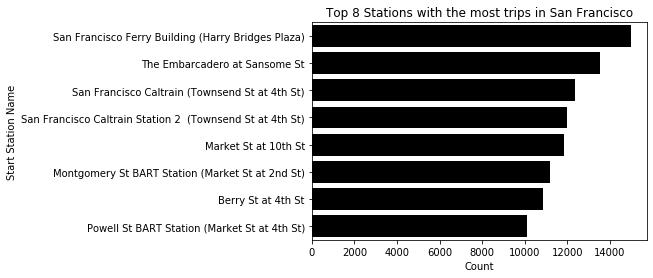

In [203]:
ord = stations.start_station_name.value_counts().index
sb.countplot(data=stations, y='start_station_name', color='black', order=ord)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 8 Stations with the most trips in San Francisco'); 

After checking start and end stations, we picked the top 8 stations to dig deeper into them later. Also I will look into the time factors in these 8 stations.

> next up, the user type is he a Subscriber or a Customer.

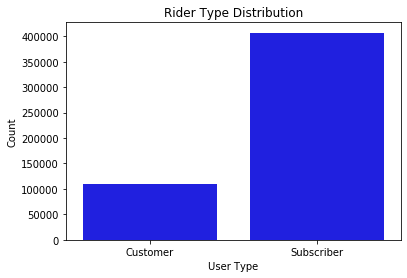

In [192]:
sb.countplot(data = bike, x = 'user_type', color= 'blue');
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Rider Type Distribution'); 

Most of the bikers are Subscribers and I do believe that this huge diffrence is because of the pricing, monthly Subscribers only pays 15$ for a month when Customers pays 2 dollars for one trip.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As expected the morning and afternnon is the most time for the trips also the weekdays have more trips than weekends.  
there were the month Jun unusual low count and after investigation I removed it.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes I have removed the data from the month Jun from the dataset because it only registerd 3 days from the month.    
Also I took the top 8 stations as a subset form the bike dataset because i want to analyze it more.

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations between features in the data.

In [193]:
# Prepare lists time variables.
times_chr = ['period_day','start_weekday_char','start_month_char']

In [194]:
# Order top 8 stations from the number one (most trips) to the number eight (least trips)
station_name = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
station_name = pd.api.types.CategoricalDtype(ordered=True, categories=station_name)
stations['start_station_name'] = stations['start_station_name'].astype(station_name)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


first correlations plotting countplot: top 8 stations by times (time of day, weekdays, months)

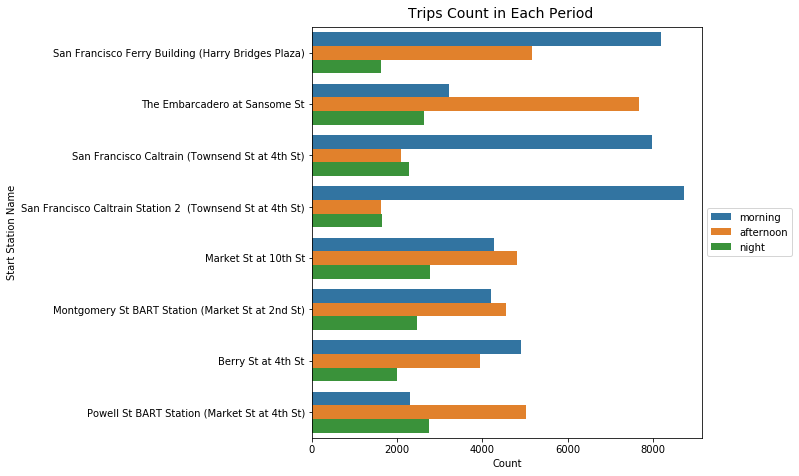

In [195]:
fig = plt.figure(figsize=(7,7))
plt.subplots_adjust(top=0.94)
fig.suptitle('Trips Count in Each Period', fontsize=14)
sb.countplot(data=stations, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count');

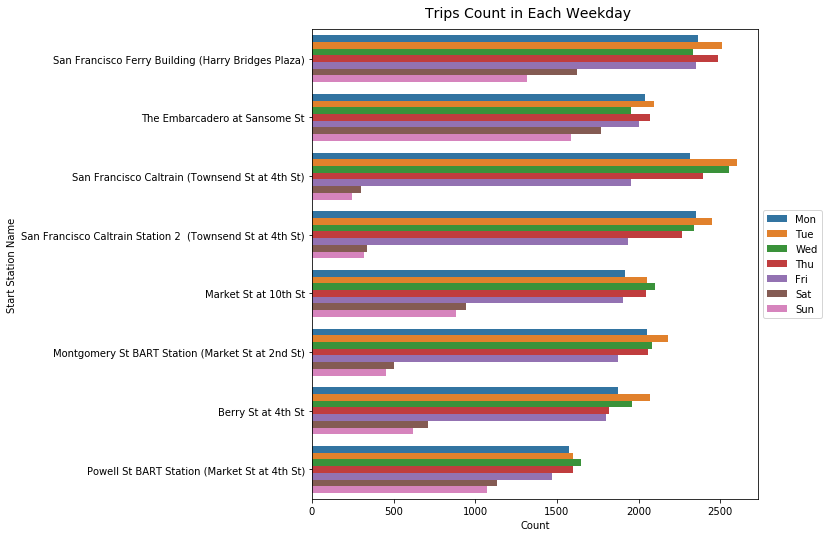

In [196]:
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(top=0.94)
fig.suptitle('Trips Count in Each Weekday', fontsize=14)
sb.countplot(data=stations, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count');

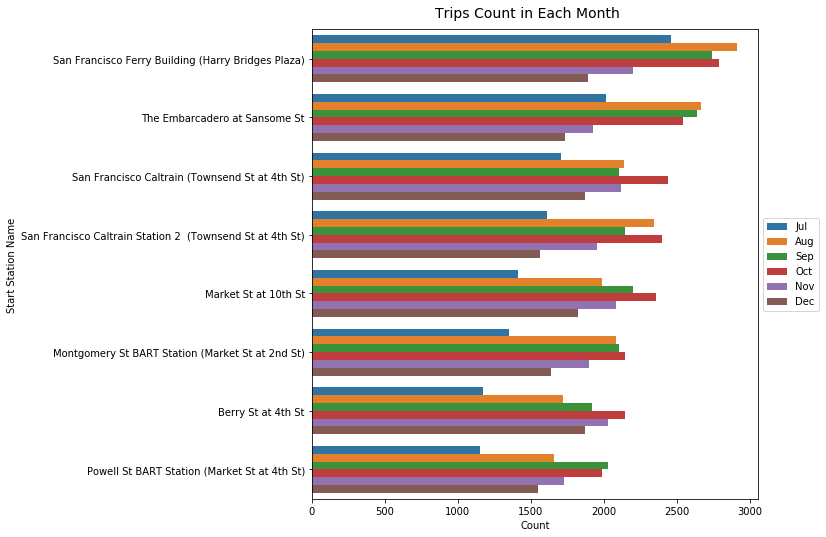

In [197]:
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(top=0.94)
fig.suptitle('Trips Count in Each Month', fontsize=14)
sb.countplot(data=stations, y='start_station_name', hue='start_month_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count');

1. Time of day: morning is not necessary the period of time with most trips there is also afternoon trips. Half of stations have the most trips during the morning and another half of stations has the most trips during the afternoon.
     
     
2. Day of week: weekdays  have the most trips than weekends (Saturday, Sunday). Friday has less trips compared to other weekdays. Some stations' weekends have more trips than other stationsmight because these stations are close to tourist attractions.
   
   
3. From August to October, the number of trips gradually increases and it decreases in the winter (November and December). Biking might be correlated with the weather. It needs more weather forecast data to support the assumption.

Second correlations plotting countplot: top 8 stations by user type attribute

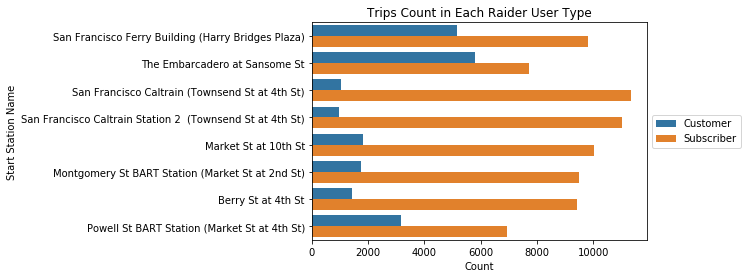

In [198]:
sb.countplot(data=stations, y='start_station_name', hue='user_type')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count');
plt.title('Trips Count in Each Raider User Type');

Apparently, subscribers are more than customers in each station. However, there are more customers at San Francisco Ferry Building (Harry Bridges Plaza) and The Embarcadero at Sansome St stations than at other stations.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

###### Time:    
* After separating into eight stations, morning is not necessary the one with most trips. But half of stations has the most trips in the morning and another half of stations has the most trips in the afternoon.    
* weekdays  have the most trips than weekends (Saturday, Sunday). Friday has less trips compared to other weekdays. Some stations' weekends have more trips than other stationsmight because these stations are close to tourist attractions.    
* From August to October, the number of trips gradually increases and it decreases in the winter (November and December). Biking might be correlated with the weather. It needs more weather forecast data to support the assumption.

###### Rider:
* Apparently, subscribers are more than customers in each station. However, there are more customers at San Francisco Ferry Building (Harry Bridges Plaza) and The Embarcadero at Sansome St stations than at other stations.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I found that the number of trips gradually increases and it decreases in the winter (November and December). Biking might be correlated with the weather, this could lead to a whole new analysis.

## Multivariate Exploration

I am most interested in locations and time with most trips. Now on, I would like to see how the trends differ after adding third or more variables.

Countplot: time of day: morning, afternoon, night between customers and subscribers in the top 8 staions

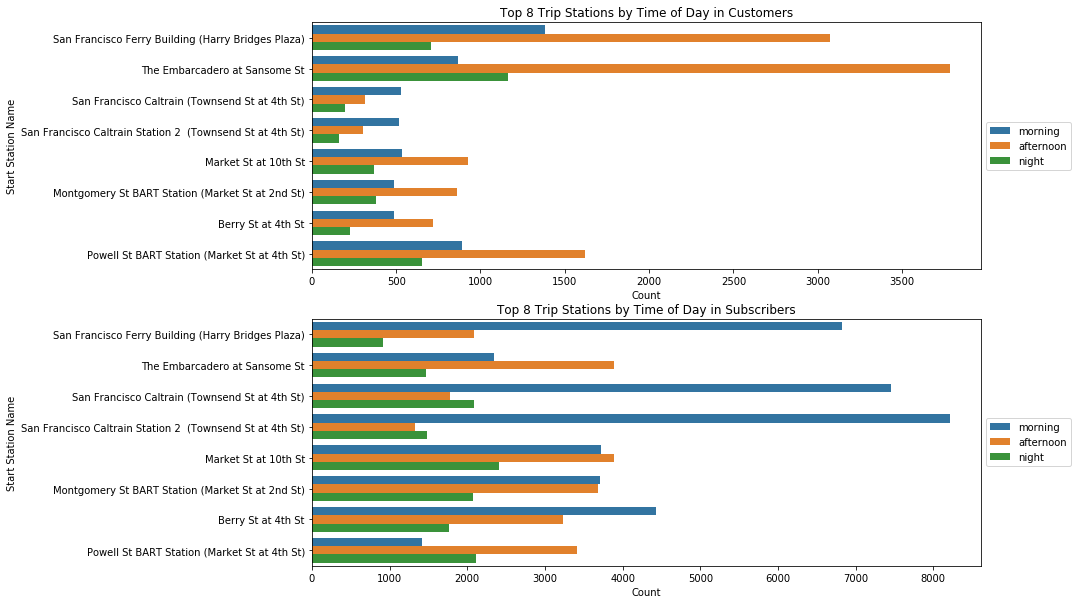

In [199]:
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=stations.query('user_type == "Customer"'), y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Time of Day in Customers')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=stations.query('user_type == "Subscriber"'), y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Time of Day in Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

Countplot: time of day: Weekday between customers and subscribers

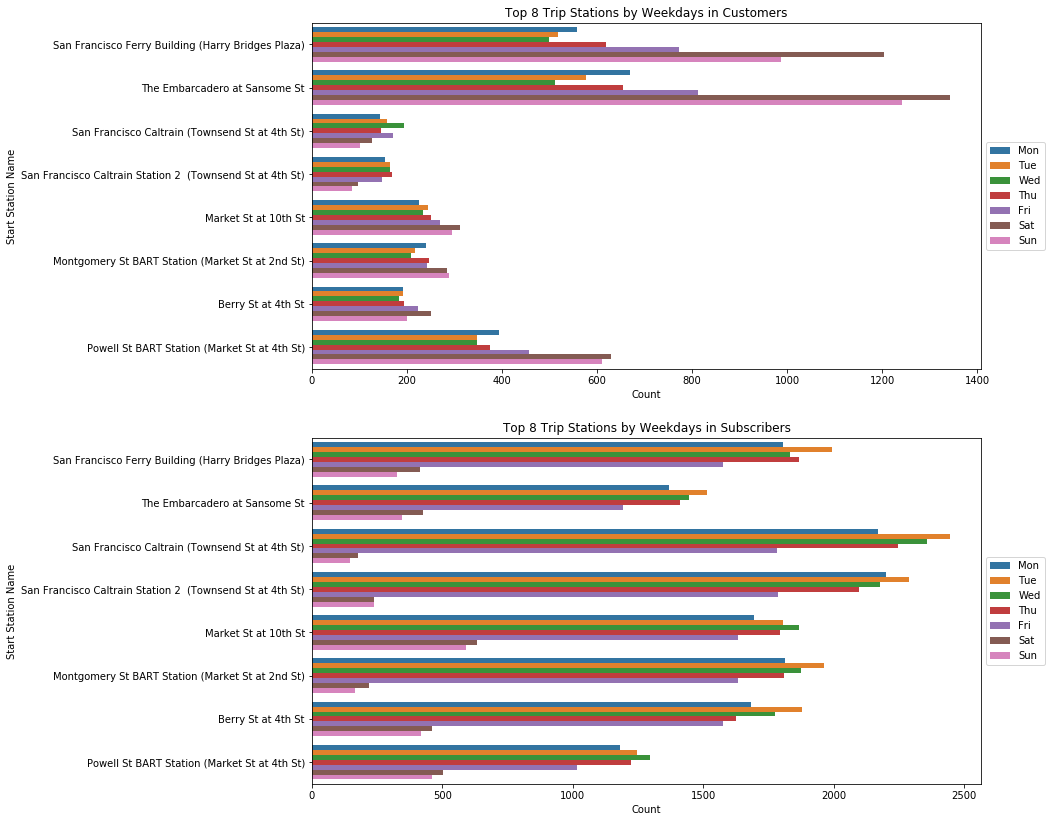

In [200]:
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=stations.query('user_type == "Customer"'), y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Weekdays in Customers')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=stations.query('user_type == "Subscriber"'), y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Weekdays in Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

Countplot: Month between customers and subscribers

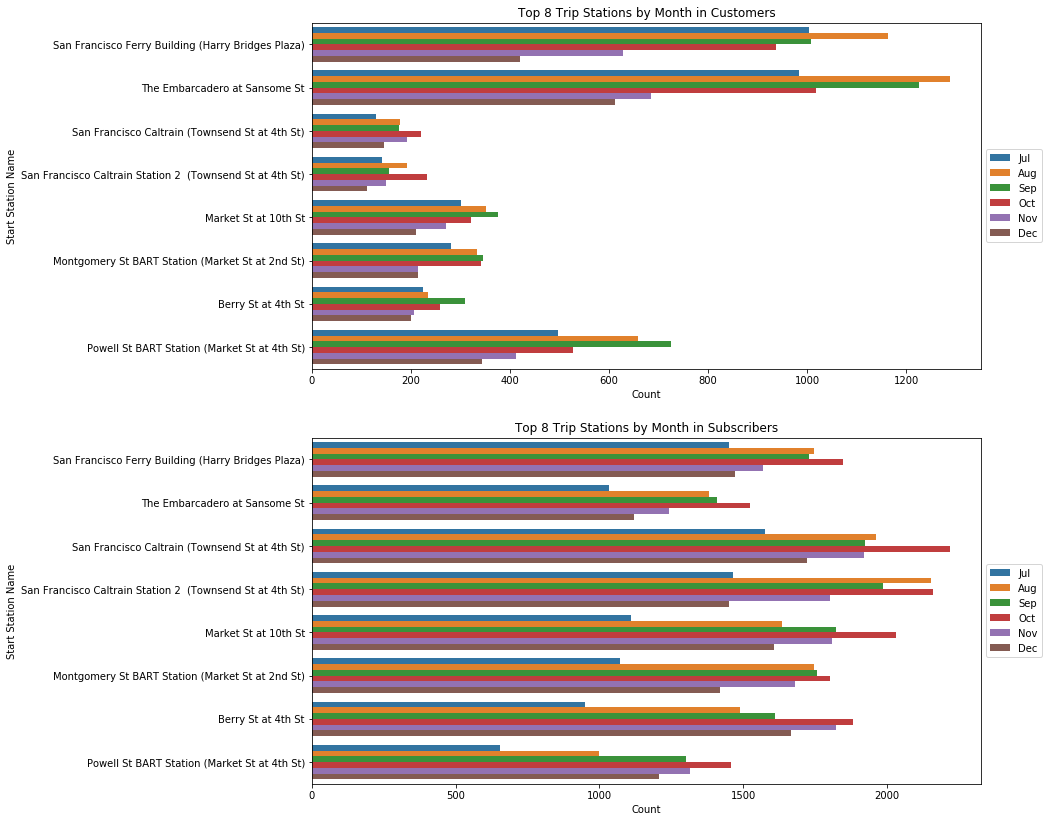

In [201]:
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=stations.query('user_type == "Customer"'), y='start_station_name', hue='start_month_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Month in Customers')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=stations.query('user_type == "Subscriber"'), y='start_station_name', hue='start_month_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Month in Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

After separating customers from subscribers, there are some interesting findings   

* Customer or subscriber they still take most of thier trips in the morning and afternoon   
* Customers probably includes tourists because most trips happen in the weekend. On the other hand, subscribers imply commuters because most trips happen in the weekdays.    
* in customers' trips, there are more trips in ferry building and Embarcadero, especially in August. In subscribers' trips, the stations are close to Bart and Caltrain stations have more trips than tourist attractions. In subscribers, after launching, trips gradually increase and then decrease when the weather becomes colder.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Separating user types, customers and subscribers, give us more information from location and time. Customers might be tourists who like to ride a bike during the weekend and in the summer. Also, the number of trips increases in the tourist attractions like Ferry building and Embarcadero (close to piers I think :) ). On the other hand, subscribers might be commuters. The trips in subscribers increase during the weekdays and after launching, the number of trips gradually increases and then decreases when the weather becomes colder

### Were there any interesting or surprising interactions between features?

> Based on the months, the figures show us the significant trips trend in summer and the decrease when it start to get colder.

export the bike and stations datasets to csv for part 2

In [204]:
stations.to_csv('stations.csv',index=False)
bike.to_csv('bike.csv',index=False)